# 📰 Fake News Detection Project  

## 💡 Business Context  
In today’s digital world, information spreads instantly through social media, online platforms, and digital news outlets. While this has made access to information easier, it has also given rise to the rapid spread of **fake news**. Misinformation can mislead the public, damage reputations, and even cause serious social and economic harm.  

The challenge of fake news is no longer limited to individuals reading misleading articles. It now impacts entire societies and industries:  

- **Political Manipulation**: Fake news can influence elections and undermine democratic processes by spreading false claims.  
- **Financial Impact**: False reports about companies, markets, or products can cause massive financial losses and volatility.  
- **Public Safety Risks**: During health crises like COVID-19, fake news about cures, vaccines, or safety measures put millions of lives at risk.  
- **Social Trust**: Continuous exposure to misinformation erodes public trust in media and reliable institutions.  

---

## 📌 Why This Project Matters  
This project focuses on creating a **system to automatically detect fake news**. Such a system has huge value for:  

- **Media Organizations** → Supporting fact-checking teams to quickly identify false stories.  
- **Social Media Platforms** → Filtering harmful or misleading content before it spreads widely.  
- **Businesses & Governments** → Protecting brands, institutions, and public trust from the damage caused by misinformation.  
- **Readers & Citizens** → Helping individuals distinguish between credible news and misinformation so they can make informed decisions.  

---

## 🎯 Business Goal  
The ultimate goal is to provide a solution that:  
1. **Reduces the spread of misinformation** by detecting fake news early.  
2. **Protects trust and credibility** in legitimate journalism and institutions.  
3. **Prevents financial and social harm** caused by false stories.  
4. **Empowers readers and platforms** to make data-driven decisions about what information to share.  

---

## 🌍 Real-World Impact  
A successful fake news detection system has the potential to:  
- Strengthen democracy by reducing the influence of fake stories in politics.  
- Protect markets and businesses from the consequences of false financial news.  
- Safeguard public health by limiting the spread of dangerous misinformation.  
- Restore confidence in media by ensuring readers are exposed to more reliable information.  

In short, this project addresses one of the most critical challenges of the digital era—**separating truth from lies in the news we consume daily**.  

---


In [1]:
from google.colab import files

uploaded = files.upload()

Saving True.csv to True.csv
Saving Fake.csv to Fake.csv


In [2]:
import pandas as pd

true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

print("True dataset shape:", true_df.shape)
print("Fake dataset shape:", fake_df.shape)


True dataset shape: (21417, 4)
Fake dataset shape: (23481, 4)


In [3]:
print("True News Sample:")
true_df.head()



True News Sample:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
print("Fake News Sample:")
fake_df.head()

Fake News Sample:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
print(true_df.info())
print(fake_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


## Check for missing values

In [6]:
print("Missing values in True dataset:\n", true_df.isnull().sum())
print("\nMissing values in Fake dataset:\n", fake_df.isnull().sum())


Missing values in True dataset:
 title      0
text       0
subject    0
date       0
dtype: int64

Missing values in Fake dataset:
 title      0
text       0
subject    0
date       0
dtype: int64


## Checking duplicates

In [7]:
print("True duplicates:", true_df.duplicated().sum())
print("Fake duplicates:", fake_df.duplicated().sum())


True duplicates: 206
Fake duplicates: 3


In [8]:
# Remove duplicates
true_df = true_df.drop_duplicates()
fake_df = fake_df.drop_duplicates()

print("True duplicates after cleaning:", true_df.duplicated().sum())
print("Fake duplicates after cleaning:", fake_df.duplicated().sum())


True duplicates after cleaning: 0
Fake duplicates after cleaning: 0


In [9]:
print("True news subjects:\n", true_df['subject'].value_counts())
print("\nFake news subjects:\n", fake_df['subject'].value_counts())


True news subjects:
 subject
politicsNews    11220
worldnews        9991
Name: count, dtype: int64

Fake news subjects:
 subject
News               9050
politics           6838
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


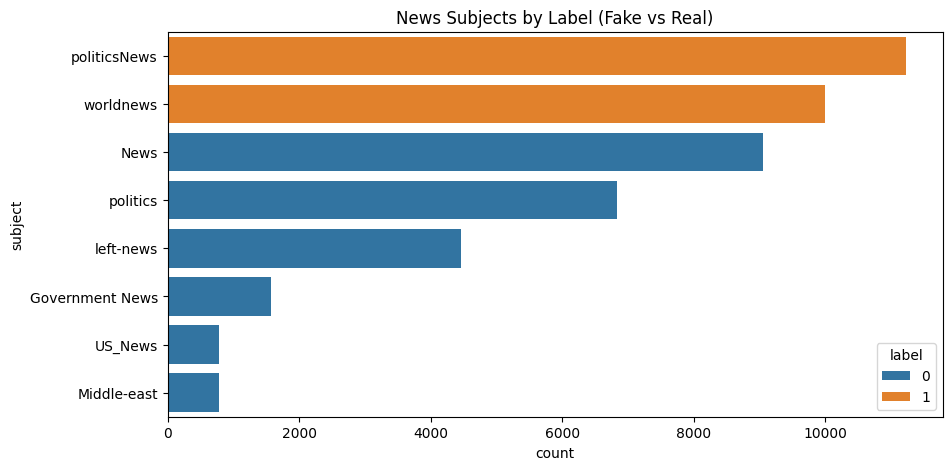

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='subject', hue='label', order=df['subject'].value_counts().index)
plt.title("News Subjects by Label (Fake vs Real)")
plt.show()


In [40]:
true_df['label'] = 1
fake_df['label'] = 0

df = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)

print("Combined dataset shape:", df.shape)
df.head()


Combined dataset shape: (44689, 5)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


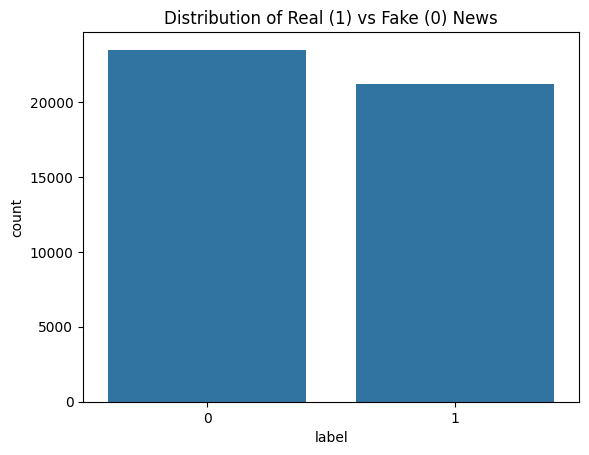

label
0    23478
1    21211
Name: count, dtype: int64


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Distribution of Real (1) vs Fake (0) News")
plt.show()

print(df['label'].value_counts())


In [25]:

# Check the date ranges
print("\nReal News Date Range:")
print(true_df['date'].min(), "to", true_df['date'].max())
print("\nFake News Date Range:")
print(fake_df['date'].min(), "to", fake_df['date'].max())




Real News Date Range:
April 1, 2016  to September 9, 2017 

Fake News Date Range:
14-Feb-18 to https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg


In [26]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   label    44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


# Exploring Date

In [42]:
df['raw_date'] = df['date']  # raw as text
df['parsed_date'] = pd.to_datetime(df['date'], errors='coerce')


In [43]:
invalid_raw = df.loc[df['parsed_date'].isna(), 'raw_date']
print("Number of invalid raw dates:", invalid_raw.shape[0])
print(invalid_raw.sample(50, random_state=42))


Number of invalid raw dates: 23478
34264          Sep 9, 2016
37829          May 9, 2016
44432     October 18, 2016
29485     February 7, 2016
27644         May 11, 2016
23744    February 14, 2017
43263        July 29, 2017
41377          Aug 4, 2016
37141         Sep 28, 2017
22333        June 16, 2017
24269     January 11, 2017
24845    November 29, 2016
42960         May 11, 2015
29404    February 11, 2016
39102         Sep 28, 2017
44501        July 29, 2016
29980     January 14, 2016
38340         Aug 19, 2015
23033       April 11, 2017
38021         Jan 22, 2016
36065          Dec 2, 2015
22122         July 7, 2017
38745          Dec 9, 2017
39724          Jun 8, 2017
33171          Jan 9, 2017
22791          May 5, 2017
29196    February 19, 2016
34939          Jun 9, 2016
30912         Oct 12, 2017
37192          Aug 7, 2017
43599     November 9, 2016
27359         May 27, 2016
36278         Oct 18, 2015
22182        June 29, 2017
27330         May 29, 2016
22638         May 17

In [44]:
from datetime import datetime
import pandas as pd

def parse_date_safe(x):
    if pd.isna(x):
        return pd.NaT
    for fmt in ("%b %d, %Y", "%B %d, %Y"):  # short and full month names
        try:
            return datetime.strptime(x.strip(), fmt)
        except:
            continue
    return pd.NaT  # if it doesn't match any format

# Apply to your raw_date column
df['date_fixed'] = df['raw_date'].apply(parse_date_safe)

print("Invalid after fixing:", df['date_fixed'].isna().sum())
print(df[['raw_date','date_fixed']].head(20))


Invalid after fixing: 45
              raw_date date_fixed
0   December 31, 2017  2017-12-31
1   December 29, 2017  2017-12-29
2   December 31, 2017  2017-12-31
3   December 30, 2017  2017-12-30
4   December 29, 2017  2017-12-29
5   December 29, 2017  2017-12-29
6   December 29, 2017  2017-12-29
7   December 29, 2017  2017-12-29
8   December 29, 2017  2017-12-29
9   December 28, 2017  2017-12-28
10  December 28, 2017  2017-12-28
11  December 28, 2017  2017-12-28
12  December 28, 2017  2017-12-28
13  December 28, 2017  2017-12-28
14  December 25, 2017  2017-12-25
15  December 27, 2017  2017-12-27
16  December 27, 2017  2017-12-27
17  December 26, 2017  2017-12-26
18  December 26, 2017  2017-12-26
19  December 24, 2017  2017-12-24


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        44689 non-null  object        
 1   text         44689 non-null  object        
 2   subject      44689 non-null  object        
 3   date         44689 non-null  object        
 4   label        44689 non-null  int64         
 5   raw_date     44689 non-null  object        
 6   parsed_date  21211 non-null  datetime64[ns]
 7   date_fixed   44644 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 2.7+ MB


In [49]:
df['date_fixed'].fillna(df['date_fixed'].mode()[0], inplace=True)


/tmp/ipython-input-2948389610.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_fixed'].fillna(df['date_fixed'].mode()[0], inplace=True)


In [50]:
df.isna().sum()

,0
title,0
text,0
subject,0
date,0
label,0
date_fixed,0


In [51]:
df.head()

,title,text,subject,date,label,date_fixed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,2017-12-31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,2017-12-29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,2017-12-31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,2017-12-30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,2017-12-29


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


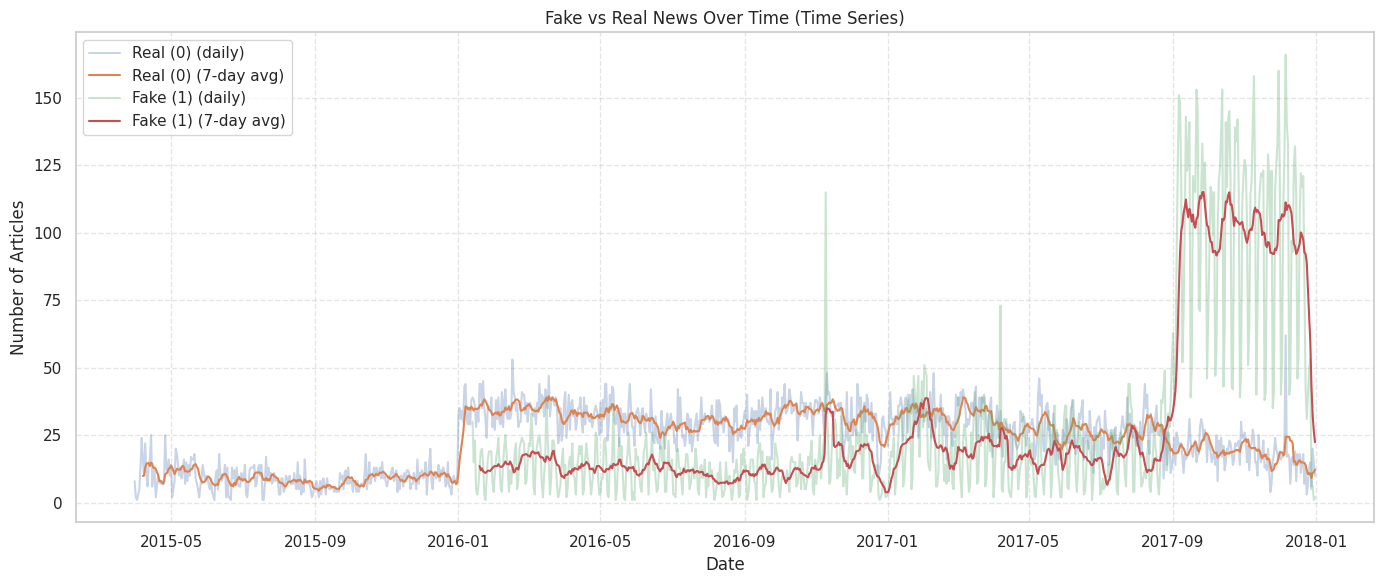

In [62]:
# Count news per day
daily_counts = df.groupby(['date_fixed', 'label']).size().reset_index(name='count')
daily_counts = daily_counts.sort_values('date_fixed')

plt.figure(figsize=(14,6))

# Separate fake and real, plot with rolling average
for label_value, label_name in [(0, "Real (0)"), (1, "Fake (1)")]:
    subset = daily_counts[daily_counts['label'] == label_value]
    plt.plot(subset['date_fixed'], subset['count'], alpha=0.3, label=f"{label_name} (daily)")
    plt.plot(subset['date_fixed'], subset['count'].rolling(7).mean(), label=f"{label_name} (7-day avg)")

plt.title("Fake vs Real News Over Time (Time Series)")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1398307737.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = df[df['label']==1].groupby(['year','month']).size().reset_index(name='count')


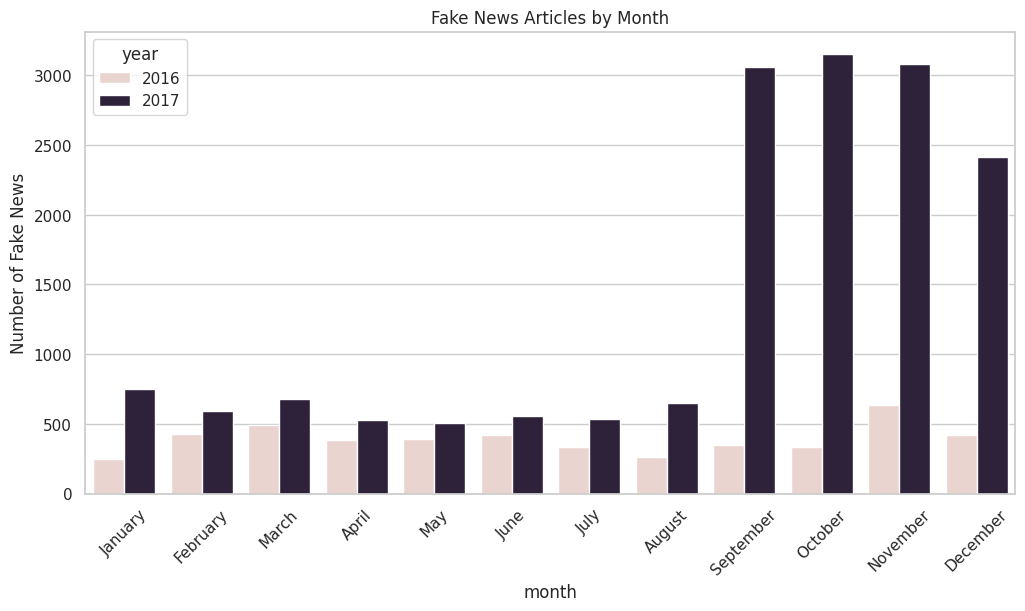

In [57]:
import calendar
from pandas.api.types import CategoricalDtype

# Define month order
month_order = list(calendar.month_name)[1:]  # ['January', 'February', ..., 'December']
month_cat = CategoricalDtype(categories=month_order, ordered=True)

# Apply categorical month type
df['month'] = df['date_fixed'].dt.month_name().astype(month_cat)
df['year'] = df['date_fixed'].dt.year

# Group and plot
monthly_counts = df[df['label']==1].groupby(['year','month']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(data=monthly_counts, x="month", y="count", hue="year")
plt.title("Fake News Articles by Month")
plt.xticks(rotation=45)
plt.ylabel("Number of Fake News")
plt.show()


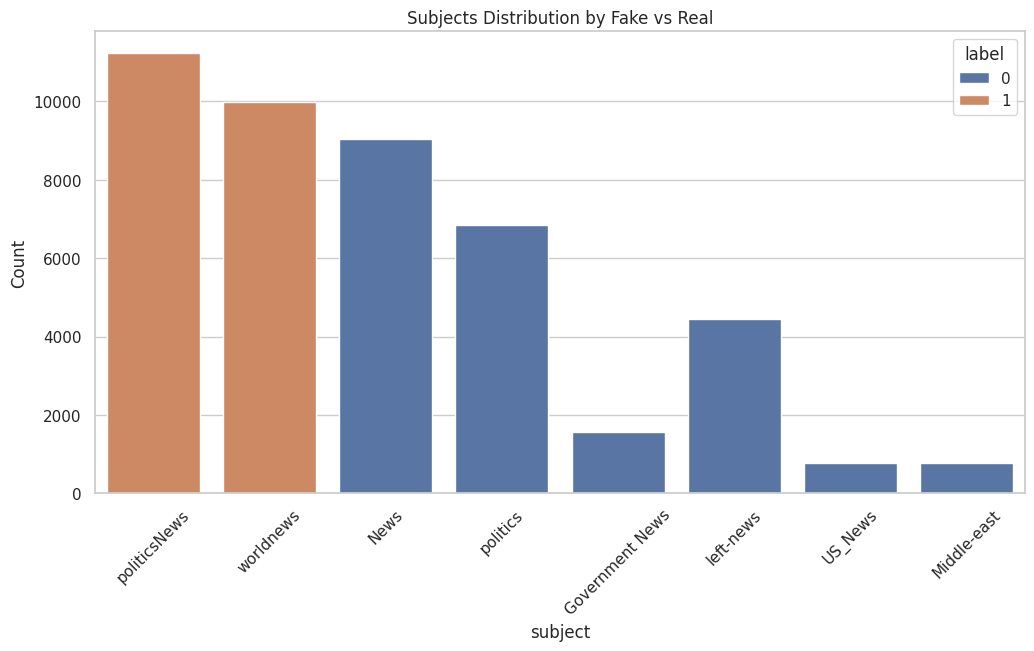

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="subject", hue="label")
plt.title("Subjects Distribution by Fake vs Real")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


In [63]:
monthly_counts = df.groupby('month')['title'].count()


/tmp/ipython-input-2001217478.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = df.groupby('month')['title'].count()


/tmp/ipython-input-2519988526.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = df.groupby(['month','subject']).size().reset_index(name='count')


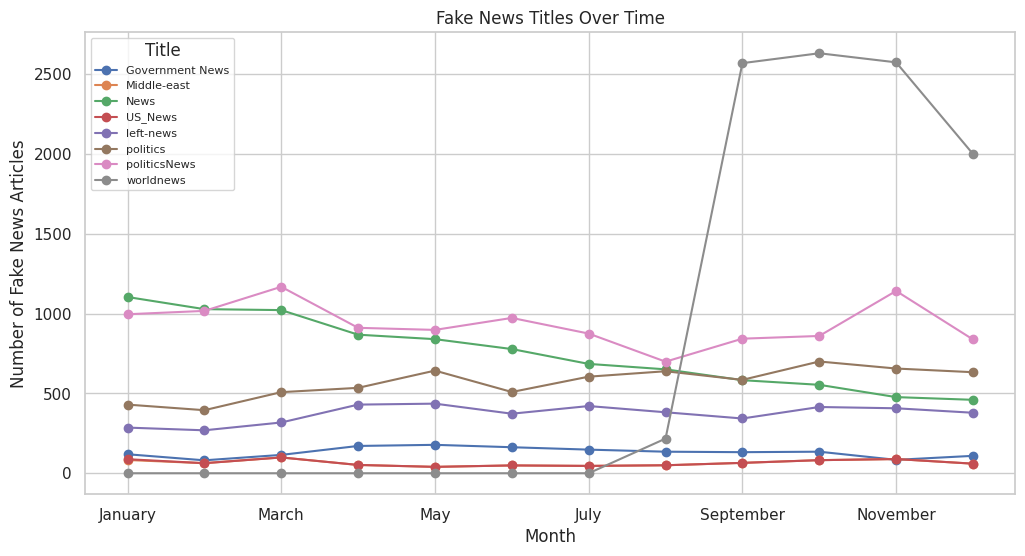

In [69]:
trend = df.groupby(['month','subject']).size().reset_index(name='count')
pivot = trend.pivot(index='month', columns='subject', values='count').fillna(0)

# Plot
ax = pivot.plot(kind='line', marker='o', figsize=(12,6))

plt.title("Fake News Titles Over Time", usetex=False)  # Disable LaTeX
plt.xlabel("Month")
plt.ylabel("Number of Fake News Articles")


plt.show()


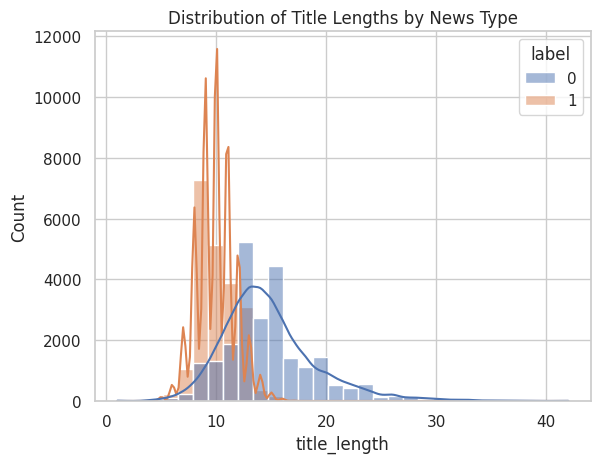

In [71]:
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))
df.groupby('label')['title_length'].mean()

sns.histplot(data=df, x='title_length', hue='label', kde=True, bins=30)
plt.title("Distribution of Title Lengths by News Type")
plt.show()


In [74]:
from scipy.stats import ttest_ind, mannwhitneyu


fake_lengths = df[df['label'] == 1]['title_length']
real_lengths = df[df['label'] == 0]['title_length']


# T-test
t_stat, p_val_t = ttest_ind(fake_lengths, real_lengths, equal_var=False)
print("T-test: t-statistic =", t_stat, ", p-value =", p_val_t)

# Mann–Whitney U test
u_stat, p_val_u = mannwhitneyu(fake_lengths, real_lengths, alternative="two-sided")
print("Mann–Whitney U: U-statistic =", u_stat, ", p-value =", p_val_u)

T-test: t-statistic = -156.21578270157875 , p-value = 0.0
Mann–Whitney U: U-statistic = 62804300.5 , p-value = 0.0


## Insights: Title Length vs Fake News

When analyzing the relation between **title length** and whether the news is **fake or real**, here are the possible insights:

### 1. Short vs. Long Titles
- Fake news might prefer **shorter, catchy titles** (to grab attention quickly).  
- Or the opposite: Fake news may use **longer, dramatic titles** stuffed with keywords to increase clicks.  

### 2. Distribution Differences
- The **average title length** for fake news may differ from real news.  
- Example: Fake = ~8 words, Real = ~12 words.  

### 3. Extreme Cases
- Fake news may use **very short “shock titles”** (e.g., *“You Won’t Believe This”*).  
- Or **overly long titles** with excessive detail to appear convincing.  

### 4. Predictive Power
- Title length could be a **useful feature** in a classification model.  
- Alone, it won’t classify well, but combined with other features (like sentiment, word choice, punctuation), it may improve predictions.  

### 5. Clickbait Behavior
- Fake news often uses **sensational adjectives, exclamation marks, or dramatic phrasing** in short titles.  
- Real news titles are typically **informative and concise**.  

---

👉 **Key Insight:**  
*"Fake news tends to use titles of X average length, compared to Y in real news. This difference suggests that title length (with other features) can help distinguish between fake and real articles."*


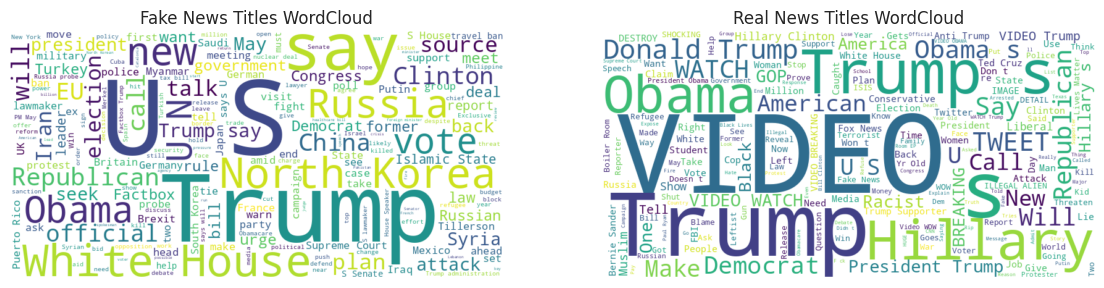

In [60]:
from wordcloud import WordCloud

# Fake news titles
fake_titles = " ".join(df[df['label']==1]['title'].astype(str))
real_titles = " ".join(df[df['label']==0]['title'].astype(str))

plt.figure(figsize=(14,6))

# Fake news wordcloud
plt.subplot(1,2,1)
wc_fake = WordCloud(width=800, height=400, background_color="white").generate(fake_titles)
plt.imshow(wc_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Fake News Titles WordCloud")

# Real news wordcloud
plt.subplot(1,2,2)
wc_real = WordCloud(width=800, height=400, background_color="white").generate(real_titles)
plt.imshow(wc_real, interpolation="bilinear")
plt.axis("off")
plt.title("Real News Titles WordCloud")

plt.show()


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         44689 non-null  object        
 1   text          44689 non-null  object        
 2   subject       44689 non-null  object        
 3   date          44689 non-null  object        
 4   label         44689 non-null  int64         
 5   date_fixed    44689 non-null  datetime64[ns]
 6   month         44689 non-null  category      
 7   year          44689 non-null  int32         
 8   title_length  44689 non-null  int64         
dtypes: category(1), datetime64[ns](1), int32(1), int64(2), object(4)
memory usage: 2.6+ MB


In [82]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

nltk.download('omw-1.4')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to get POS tag for lemmatizer
from nltk import pos_tag

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs, emails, and non-alphabetic characters
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize
    tokens = word_tokenize(text)
    # Lemmatize with POS tagging
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word))
              for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['processed_text'] = df['text'].apply(preprocess_text)
df['processed_title'] = df['title'].apply(preprocess_text)

# Check transformation
print("Original text sample:")
print(df['text'].iloc[0][:200])
print("\nProcessed text sample:")
print(df['processed_text'].iloc[0][:200])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Original text sample:
WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal 

Processed text sample:
washington reuters head conservative republican faction u congress vote month huge expansion national debt pay tax cut call fiscal conservative sunday urge budget restraint keep sharp pivot way among 


In [92]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size_text = 50000
oov_token = "<OOV>"
tokenizer_text = Tokenizer(num_words=vocab_size_text, oov_token=oov_token)
tokenizer_text.fit_on_texts(df['processed_text'].tolist())

vocab_size_title = 10000
tokenizer_title = Tokenizer(num_words=vocab_size_title, oov_token=oov_token)
tokenizer_title.fit_on_texts(df['processed_title'].tolist())

max_len_text = 300
max_len_title = 30

X_text = pad_sequences(tokenizer_text.texts_to_sequences(df['processed_text']),
                       maxlen=max_len_text, padding='post', truncating='post')

X_title = pad_sequences(tokenizer_title.texts_to_sequences(df['processed_title']),
                        maxlen=max_len_title, padding='post', truncating='post')


In [88]:
from sklearn.preprocessing import LabelEncoder


le_subject = LabelEncoder()
df['subject_encoded'] = le_subject.fit_transform(df['subject'].astype(str))

X_subject = df['subject_encoded'].values


In [93]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Convert month name → number
df['month_num'] = df['month'].map(month_dict).astype(int)

# Cyclical encoding for months
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

# Scale year & title_length
scaler = StandardScaler()
df[['year_scaled', 'title_length_scaled']] = scaler.fit_transform(df[['year', 'title_length']])

# Convert date to numeric (days since epoch) + scale
df['date_numeric'] = (df['date_fixed'] - pd.Timestamp("1970-01-01")).dt.days
df['date_numeric_scaled'] = scaler.fit_transform(df[['date_numeric']])

# Final numeric features
X_features = df[['year_scaled', 'month_sin', 'month_cos', 'title_length_scaled', 'date_numeric_scaled']].values


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Labels
y = df['label'].values  # تصنيف الأخبار (0=real, 1=fake) أو حسب الداتا عندك

# Split data (train/test)
X_text_train, X_text_test, \
X_title_train, X_title_test, \
X_subject_train, X_subject_test, \
X_features_train, X_features_test, \
y_train, y_test = train_test_split(
    X_text, X_title, X_subject, X_features, y,
    test_size=0.2, random_state=42, stratify=y
)

In [97]:
# Convert numeric features to float32
X_features_train = X_features_train.astype('float32')
X_features_test = X_features_test.astype('float32')

# Ensure subject is int32
X_subject_train_reshaped = X_subject_train_reshaped.astype('int32')
X_subject_test_reshaped = X_subject_test_reshaped.astype('int32')

# Check for NaNs
import numpy as np
print(np.isnan(X_features_train).sum(), np.isnan(X_features_test).sum())
print(np.isnan(X_text_train).sum(), np.isnan(X_text_test).sum())


0 0
0 0


In [100]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# ==================== Inputs ====================
# Text input
text_input = Input(shape=(max_len_text,), name='text_input')
text_emb = Embedding(input_dim=vocab_size_text, output_dim=128, input_length=max_len_text)(text_input)
text_lstm = LSTM(32, return_sequences=False)(text_emb)
text_lstm = Dropout(0.3)(text_lstm)

# Title input
title_input = Input(shape=(max_len_title,), name='title_input')
title_emb = Embedding(input_dim=vocab_size_title, output_dim=64, input_length=max_len_title)(title_input)
title_lstm = LSTM(16, return_sequences=False)(title_emb)
title_lstm = Dropout(0.3)(title_lstm)

# Subject input
subject_input = Input(shape=(1,), name='subject_input')
subject_emb = Embedding(input_dim=len(le_subject.classes_), output_dim=8, input_length=1)(subject_input)
subject_flat = Flatten()(subject_emb)
subject_flat = Dropout(0.3)(subject_flat)

# Numeric features input
features_input = Input(shape=(X_features_train.shape[1],), name='features_input')
features_dense = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(features_input)
features_dense = Dropout(0.3)(features_dense)

# ==================== Concatenate ====================
concat = Concatenate()([text_lstm, title_lstm, subject_flat, features_dense])
x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(concat)
x = Dropout(0.4)(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

# ==================== Model ====================
model = Model(inputs=[text_input, title_input, subject_input, features_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])
model.summary()

# ==================== Callbacks ====================
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ==================== Train ====================
history = model.fit(
    [X_text_train, X_title_train, X_subject_train_reshaped, X_features_train],
    y_train,
    validation_data=([X_text_test, X_title_test, X_subject_test_reshaped, X_features_test], y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop]
)

# ==================== Evaluate ====================
y_pred = (model.predict([X_text_test, X_title_test, X_subject_test_reshaped, X_features_test]) > 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ title_input         │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subject_input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_9         │ (None, 300, 128)  │  6,400,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_10        │ (None, 30, 64)    │    640,000 │ title_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_11        │ (None, 1, 8)      │         64 │ subject_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ features_input      │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 32)        │     20,608 │ embedding_9[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 16)        │      5,184 │ embedding_10[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 8)         │          0 │ embedding_11[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │        192 │ features_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ lstm_6[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 16)        │          0 │ lstm_7[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 8)         │          0 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 32)        │          0 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 88)        │          0 │ dropout_3[0][0],  │
│ (Concatenate)       │                   │            │ dropout_4[0][0],  │
│                     │                   │            │ dropout_5[0][0],  │
│                     │                   │            │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      5,696 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64)        │          0 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 32)        │      2,080 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 32)        │          0 │ dense_14[0][0]  

 Total params: 7,073,857 (26.98 MB)

 Trainable params: 7,073,857 (26.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8936 - loss: 0.3238 - val_accuracy: 1.0000 - val_loss: 0.0424
Epoch 2/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9997 - loss: 0.0371 - val_accuracy: 1.0000 - val_loss: 0.0182
Epoch 3/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9996 - loss: 0.0180 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 4/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9999 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 5/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9999 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 6/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9998 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 7/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9999 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 8/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9999 - loss: 0.0046 - 

In [101]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GRU, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# ==================== Inputs ====================
# Text input
text_input = Input(shape=(max_len_text,), name='text_input')
text_emb = Embedding(input_dim=vocab_size_text, output_dim=128, input_length=max_len_text)(text_input)
text_gru = GRU(32, return_sequences=False)(text_emb)
text_gru = Dropout(0.3)(text_gru)

# Title input
title_input = Input(shape=(max_len_title,), name='title_input')
title_emb = Embedding(input_dim=vocab_size_title, output_dim=64, input_length=max_len_title)(title_input)
title_gru = GRU(16, return_sequences=False)(title_emb)
title_gru = Dropout(0.3)(title_gru)

# Subject input
subject_input = Input(shape=(1,), name='subject_input')
subject_emb = Embedding(input_dim=len(le_subject.classes_), output_dim=8, input_length=1)(subject_input)
subject_flat = Flatten()(subject_emb)
subject_flat = Dropout(0.3)(subject_flat)

# Numeric features input
features_input = Input(shape=(X_features_train.shape[1],), name='features_input')
features_dense = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(features_input)
features_dense = Dropout(0.3)(features_dense)

# ==================== Concatenate ====================
concat = Concatenate()([text_gru, title_gru, subject_flat, features_dense])
x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(concat)
x = Dropout(0.4)(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

# ==================== Model ====================
model_gru = Model(inputs=[text_input, title_input, subject_input, features_input], outputs=output)
model_gru.compile(loss='binary_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])
model_gru.summary()

# ==================== Callbacks ====================
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ==================== Train ====================
history_gru = model_gru.fit(
    [X_text_train, X_title_train, X_subject_train_reshaped, X_features_train],
    y_train,
    validation_data=([X_text_test, X_title_test, X_subject_test_reshaped, X_features_test], y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop]
)

# ==================== Evaluate ====================
y_pred_gru = (model_gru.predict([X_text_test, X_title_test, X_subject_test_reshaped, X_features_test]) > 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_gru = accuracy_score(y_test, y_pred_gru)
prec_gru = precision_score(y_test, y_pred_gru)
rec_gru = recall_score(y_test, y_pred_gru)
f1_gru = f1_score(y_test, y_pred_gru)

print(f"GRU Accuracy: {acc_gru:.4f}")
print(f"GRU Precision: {prec_gru:.4f}")
print(f"GRU Recall: {rec_gru:.4f}")
print(f"GRU F1 Score: {f1_gru:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ title_input         │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subject_input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 300, 128)  │  6,400,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_13        │ (None, 30, 64)    │    640,000 │ title_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, 1, 8)      │         64 │ subject_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ features_input      │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru (GRU)           │ (None, 32)        │     15,552 │ embedding_12[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 16)        │      3,936 │ embedding_13[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 8)         │          0 │ embedding_14[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 32)        │        192 │ features_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 32)        │          0 │ gru[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 16)        │          0 │ gru_1[0][0]       │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 8)         │          0 │ flatten_4[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 32)        │          0 │ dense_16[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 88)        │          0 │ dropout_9[0][0],  │
│ (Concatenate)       │                   │            │ dropout_10[0][0], │
│                     │                   │            │ dropout_11[0][0], │
│                     │                   │            │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 64)        │      5,696 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 64)        │          0 │ dense_17[0][0]    │
│ (Dropout)           │                   │            │                 

 Total params: 7,067,553 (26.96 MB)

 Trainable params: 7,067,553 (26.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9046 - loss: 0.3101 - val_accuracy: 1.0000 - val_loss: 0.0408
Epoch 2/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9998 - loss: 0.0358 - val_accuracy: 1.0000 - val_loss: 0.0178
Epoch 3/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9996 - loss: 0.0183 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 4/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9999 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 5/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9999 - loss: 0.0084 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 6/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9998 - loss: 0.0072 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 7/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9999 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 8/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 1.0000 - loss: 0.0048 - 

# RNN


In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [116]:
# Titles and labels
X = df['processed_title'].astype(str).values
y = df['label'].values

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [117]:
from tensorflow.keras.preprocessing.text import Tokenizer

vocab_size = 10000  # max words in title
max_len = 30        # max title length

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [118]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(SimpleRNN(32))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [119]:
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=64
)


Epoch 1/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8489 - loss: 0.3638 - val_accuracy: 0.9407 - val_loss: 0.1618
Epoch 2/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9670 - loss: 0.1102 - val_accuracy: 0.9499 - val_loss: 0.1531
Epoch 3/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9775 - loss: 0.0749 - val_accuracy: 0.9553 - val_loss: 0.1499
Epoch 4/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9869 - loss: 0.0472 - val_accuracy: 0.9466 - val_loss: 0.2089
Epoch 5/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9910 - loss: 0.0358 - val_accuracy: 0.9544 - val_loss: 0.1459
Epoch 6/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9918 - loss: 0.0283 - val_accuracy: 0.9536 - val_loss: 0.2077
Epoch 7/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9938 - loss: 0.0235 - val_accuracy: 0.9502 - val_loss: 0.2168
Epoch 8/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9955 - loss: 0.0168 - val_accuracy: 

In [120]:
y_pred = (model.predict(X_test_pad) > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")


280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 0.9544
Precision: 0.9515
Recall: 0.9524
F1 Score: 0.9519
